In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import spacy
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [11]:
# Load the data
data = pd.read_csv('../data/solar_ml_abstracts.csv')

In [12]:
# Display the first few rows of the dataset
data.head()


,title,summary,published
0,Solar Flare Prediction Model with Three Machin...,We developed a flare prediction model using ma...,2016-11-06T15:09:50Z
1,Inferring Maps of the Sun's Far-side Unsigned ...,Accurate modeling of the Sun's coronal magneti...,2022-11-23T02:10:00Z
2,Inclination Angles for Be Stars Determined Usi...,We test the viability of training machine lear...,2023-10-27T19:23:55Z
3,A Machine Learning Approach to Correcting Atmo...,Current post-processing techniques for the cor...,2020-11-25T15:17:26Z
4,Solar Flare Prediction Using SDO/HMI Vector Ma...,We attempt to forecast M-and X-class solar fla...,2014-11-05T21:00:03Z


In [13]:
# Basic information about the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      836 non-null    object
 1   summary    836 non-null    object
 2   published  836 non-null    object
dtypes: object(3)
memory usage: 19.7+ KB


# EDA


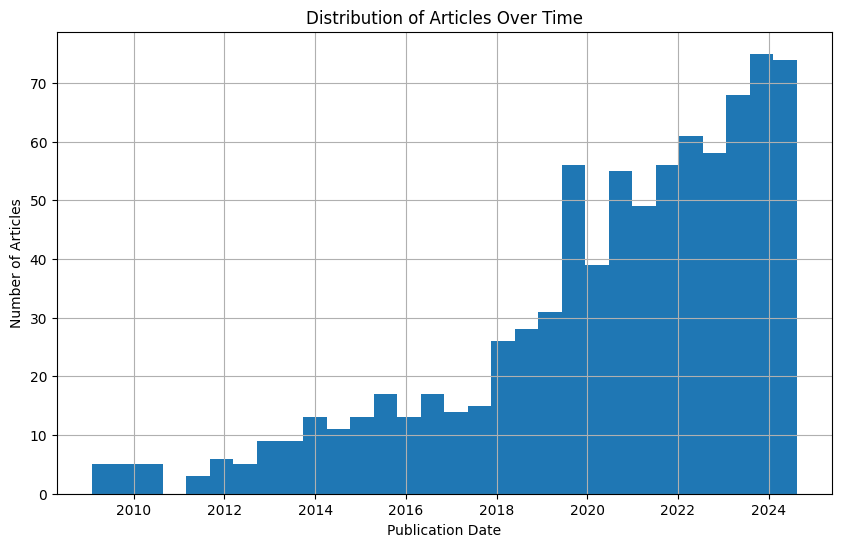

In [14]:
# Convert the 'published' column to datetime format
data['published'] = pd.to_datetime(data['published'])

# Plot the distribution of articles over time
plt.figure(figsize=(10, 6))
data['published'].hist(bins=30)
plt.title('Distribution of Articles Over Time')
plt.xlabel('Publication Date')
plt.ylabel('Number of Articles')
plt.show()


In [15]:
#Identificar la evolución en la cantidad de artículos publicados sobre solar physics y machine learning a lo largo del tiempo.
data['published'] = pd.to_datetime(data['published'])

In [16]:
data['year'] = data['published'].dt.year
articles_per_year = data.groupby('year').size()

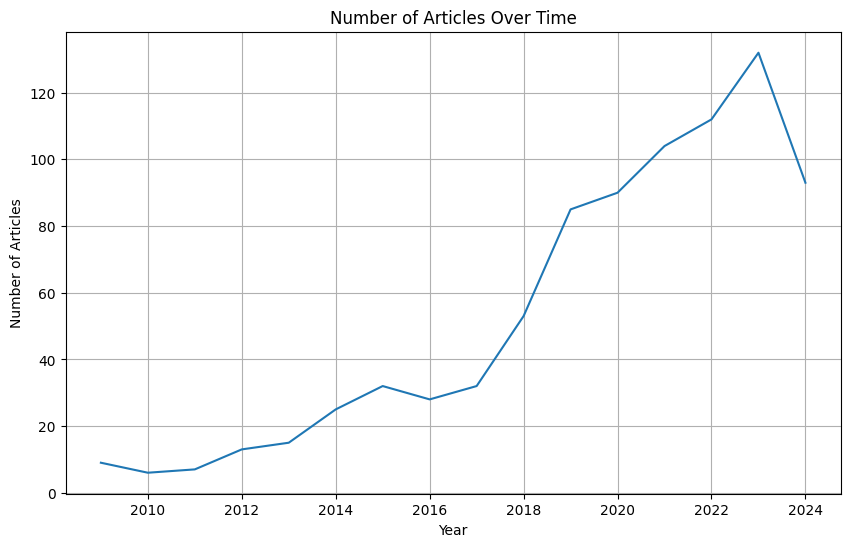

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
articles_per_year.plot(kind='line')
plt.title('Number of Articles Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

In [18]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


### Nule value

In [19]:
print(data['summary'].isnull().sum()) 

0


### Duplicate value

In [24]:
# Encontrar los valores duplicados en la columna 'summary'
duplicated_summaries = data[data['summary'].duplicated(keep=False)]

# Mostrar los valores duplicados
print(duplicated_summaries)


Empty DataFrame
Columns: [title, summary, published, year]
Index: []


# Preprocesing 

# NLTK
El método word_tokenize nos permite tokenizar texto en palabras.

In [48]:
# Descarga los recursos necesarios
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/alyonaivanova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/alyonaivanova/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alyonaivanova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
import nltk

# Añadir manualmente la ruta de nltk_data
nltk.data.path.append('/home/alyonaivanova/nltk_data')

# Ahora, descargar de nuevo 'punkt'
nltk.download('punkt')

# Intentar tokenizar de nuevo
data['summary'] = data['summary'].astype(str)
tokenized_summaries = [nltk.word_tokenize(doc) for doc in data['summary']]
print(tokenized_summaries)


[nltk_data] Downloading package punkt to
[nltk_data]     /home/alyonaivanova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/home/alyonaivanova/nltk_data'
    - '/home/alyonaivanova/miniconda3/envs/MasterAI/nltk_data'
    - '/home/alyonaivanova/miniconda3/envs/MasterAI/share/nltk_data'
    - '/home/alyonaivanova/miniconda3/envs/MasterAI/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/home/alyonaivanova/nltk_data'
**********************************************************************


In [51]:
tokenized_summaries = []
for idx, doc in enumerate(data['summary']):
    try:
        tokens = nltk.word_tokenize(doc)
        tokenized_summaries.append(tokens)
    except Exception as e:
        print(f"Error al tokenizar el documento en el índice {idx}: {e}")
        tokenized_summaries.append(None)


Error al tokenizar el documento en el índice 0: 
**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/english/

  Searched in:
    - '/home/alyonaivanova/nltk_data'
    - '/home/alyonaivanova/miniconda3/envs/MasterAI/nltk_data'
    - '/home/alyonaivanova/miniconda3/envs/MasterAI/share/nltk_data'
    - '/home/alyonaivanova/miniconda3/envs/MasterAI/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

Error al tokenizar el documento en el índice 1: 
**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Dow

In [11]:
# i términos como "deep learning" han ganado popularidad más recientemente en el campo de la física solar.
# Convert the abstracts to a document-term matrix
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = count_vectorizer.fit_transform(data['summary'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display the top words for each topic
for index, topic in enumerate(lda.components_):
    print(f"Topic #{index}")
    print([count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic #0
['candidates', 'machine', 'sample', 'star', 'gaia', 'mass', 'using', 'stellar', 'data', 'stars']
Topic #1
['mass', 'star', 'machine', 'data', 'variables', 'classification', 'variable', 'curves', 'stars', 'light']
Topic #2
['earth', 'machine', 'present', 'activity', 'time', 'data', 'sun', 'solar', 'planet', 'planets']
Topic #3
['using', 'time', 'model', 'flares', 'machine', 'magnetic', 'learning', 'flare', 'data', 'solar']
Topic #4
['models', 'using', 'stars', 'machine', 'learning', 'parameters', 'data', 'model', 'spectra', 'stellar']


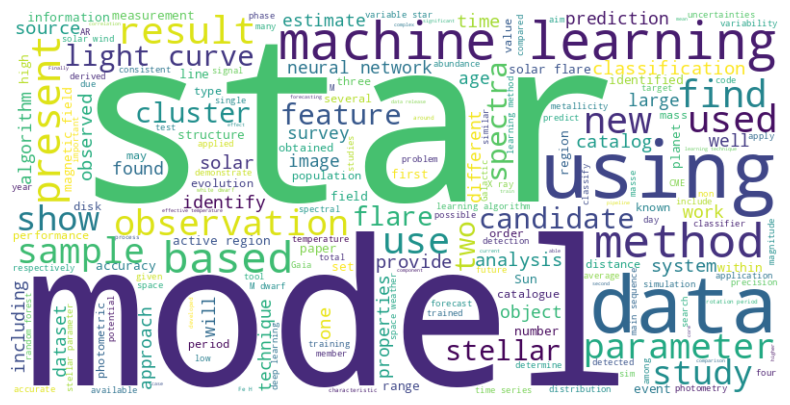

In [12]:
text = " ".join(data['summary'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()




In [13]:
## Análisis Comparativo de Técnicas de NLP
# spaCy Lematization
nlp = spacy.load("en_core_web_sm")
def spacy_lemmatization(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

# NLTK Stemming
stemmer = PorterStemmer()
def nltk_stemming(text):
    tokens = word_tokenize(text)
    return " ".join([stemmer.stem(token) for token in tokens])

# Apply and compare
data['summary_spacy'] = data['summary'].apply(spacy_lemmatization)
data['summary_stemmed'] = data['summary'].apply(nltk_stemming)


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/home/alyonaivanova/nltk_data'
    - '/home/alyonaivanova/miniconda3/envs/MasterAI/nltk_data'
    - '/home/alyonaivanova/miniconda3/envs/MasterAI/share/nltk_data'
    - '/home/alyonaivanova/miniconda3/envs/MasterAI/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
